### Vectores

In [9]:
from typing import List

Vector = List[float]

peso_talla_edad = [80,1.73,34]
diferencia = [3,0.05,3]

resultado = peso_talla_edad + diferencia
print("Resultado de la suma de listas:", resultado)

Resultado de la suma de listas: [80, 1.73, 34, 3, 0.05, 3]


### Sumando los vectores

In [10]:
resultado = [peso_talla_edad[i] + diferencia[i] for i in range(len(peso_talla_edad))]
resultado

[83, 1.78, 37]

In [11]:
#Implementando como función
def add_vectors(v:Vector, w:Vector) -> Vector:
    assert len(v) == len(w), "Los vectores deben tener la misma dimensión"
    return [v[i] + w[i] for i in range(len(v))]

add_vectors(peso_talla_edad, diferencia)

[83, 1.78, 37]

### Suma de lista de vectores

In [14]:
def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, "La lista de vectores no debe estar vacía (la listas vacías se evalúan como False)" 
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Todos los vectores deben tener la misma dimensión"
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)] 

vector_sum([[1,2,3,4], [4,5,6,7], [7,8,9,10]])

[12, 15, 18, 21]

### Producto de vector con un scalar

In [16]:
def escalar_multi(c: float, v:Vector) -> Vector:
    return [c * v_i for v_i in v]

escalar_multi(2, [1,2,3])

[2, 4, 6]

### Cálculo de la media por componente de una lista (por columna)

In [18]:
def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return escalar_multi(1/n, vector_sum(vectors))

vector_mean([[1,2,3], [4,5,6], [7,8,9]])

[4.0, 5.0, 6.0]

### Producto punto
    - Suma de los productos por componentes

In [20]:
def dot(v:Vector, w:Vector) -> float:
    assert len(v) == len(w), "Los vectores deben tener la misma diemensión"
    return sum(v_i * w_i for v_i, w_i in zip(v, w)) 

dot([1,2,3], [4,5,6])

32

#### Utilizando dot (producto punto) se puede calcula la suma de cuadrados de un vector

In [22]:
def sum_of_squares(v: Vector) -> float:
    return dot(v, v)

sum_of_squares([1,2,3])

14

### Cálculo de la magnitud (longitud) de un vector

In [25]:
import math

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v)) # aplicando la raíz cuadrada al resultado de sum_of_squares

magnitude([3,4])

5.0

### Matrices

In [28]:
matrix = List[List[Vector]]

# matriz con 2 filas y 3 columnas
A = [[1,2,3],
     [4,5,6]]

# matriz con 3 filas y 2 columnas
B = [[1,2],
     [3,4],
     [5,6]]

### Filas y columnas de una matriz

In [31]:
from typing import Tuple

def shape(A: matrix) -> Tuple[int, int]:
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

shape(A) # 2 filas, 3 columnas

(2, 3)

### Valores de filas y columnas de una matriz

In [33]:
def value_row(A: matrix, i: int) -> Vector:
    return A[i]

value_row(A, 0) # primera fila

[1, 2, 3]

In [35]:
def value_column(A: matrix, i: int) -> Vector:
    return [A_i[i] for A_i in A]

value_column(A, 1) # segunda columna

[2, 5]

### Generando elementos de la matriz

In [42]:
from typing import Callable

def make_matrix(num_rows: int, num_cols: int, entry_fn: Callable[[int, int], float]) -> matrix:
    return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

print(make_matrix(3, 4, lambda i, j: i + j)) # matriz donde cada entrada es la suma de sus índices
print("="*40)
print(make_matrix(3, 4, lambda i, j: 1 if i == j else 0)) # matriz identidad

[[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5]]
[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]


### El descenso de gradiente

### Estimando el gradiente

In [48]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x+h) - f(x)) / h

In [45]:
def square(x: float) -> float:
    return x * x

In [46]:
def derivative(x: float) -> float:
    return 2 * x

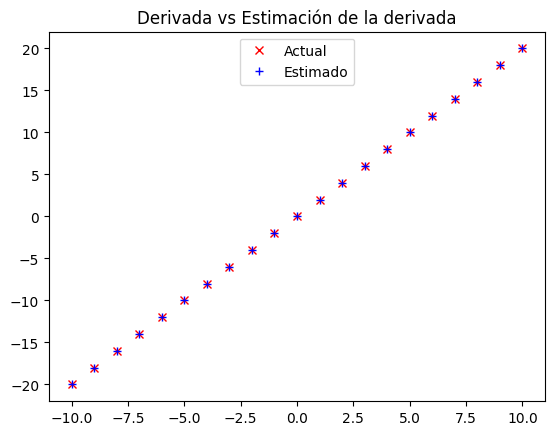

In [55]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# se traza para mostrar que son practicamente iguales
import matplotlib.pyplot as plt
plt.title("Derivada vs Estimación de la derivada")
plt.plot(xs, actuals, "rx", label="Actual")
plt.plot(xs, estimates, "b+", label="Estimado")
plt.legend(loc=9)
plt.show()